# Importing the Necessary Modules and Libraries

<div class="alert alert-block alert-warning">
<span style="font-family:Comic Sans MS">
<font color=DarkGoldenRod>
1. NumPy is a python library fundamental for scientific computing, it includes several mathematical operations, a multidimensonal array object as well as routines to operate on those objects, and many other functions.
    <br>
2. Glob is a module used for finding paths to specific objects.
    <br>
3. Argparse is a module used to input command-line arguments.
    <br>
4. Logging is a module used for tracking events related to how the code runs.
    <br>
5. Sys is a module for used for defining system specific parameters and functions
    <br>
6. Os is a module that allows for interact with the operationg-system functionalities.
</font>
</span>
</div>

In [1]:
#!/usr/bin/env python
import numpy as np
import glob
import argparse
import logging
import sys
import os

### These specific functions were devloped for this rate calculation software

<div class="alert alert-block alert-warning">
<span style="font-family:Comic Sans MS">
<font color=DarkGoldenRod>
7. read_in is used for inputing the Fast Radio Burst (FRB) data
    <br>
8. make_corner is used at the end of the code to make a corner plot that displays the results of the mcmc analysis
    <br>
9. sampling is the function that performs the mcmc analysis
    <br>
10. convert_params is used to converts the samples extracted from the mcmc analysis into the correct form for plotting in the corner plot
    <br>
11. read_samples is used to extract the samples from the mcmc analysis
</font>
</span>
</div>

In [2]:
from barb.read_inputs import read_in
from barb.plotting import make_corner
from barb.mcmc import sampling, convert_params, read_samples

***

# Defining the Argparser Arguments

<div class="alert alert-block alert-warning">
<span style="font-family:Comic Sans MS">
<font color=DarkGoldenRod>
- When arguments are entered in the command line, these following lines of code decide how they're intepretted.
    <br>
    - In this notebook, we will not be interfacing with the command line, but this is still relevant for understanding how everything works.
</font>
</span>
</div>

In [3]:
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

<div class="alert alert-block alert-info">
<span style="font-family:Comic Sans MS">
<font color=CornflowerBlue>
if __name__ == "__main__":
<br>
&nbsp;&nbsp;&nbsp;&nbsp;parser = argparse.ArgumentParser(
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;description="""Bayesian Rate-Estimation for FRBs (BaRB)
<br>
sample command: python run_analysis.py -D [path to the surveys] -c [number of cpus] -r [name of h5 file] -n [name of corner plot] -m [max iterations of mcmc]
<br>
Surveys on the original data set: Agarwal 2019, Masui 2015, Men 2019, Bhandari 2018, Golpayegani 2019, Oslowski 2019, GREENBURST, Bhandari 2019, Qiu 2019, Shannon 2018, Madison 2019, Lorimer 2007, Deneva 2009, Keane 2010, Siemion 2011, Burgay 2012, Petroff 2014, Spitler 2014, Burke-Spolaor 2014, Ravi 2015, Petroff 2015, Law 2015, Champion 2016""",
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;formatter_class=argparse.RawTextHelpFormatter,
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;prog="run_analysis.py",
<br>
&nbsp;&nbsp;&nbsp;&nbsp;)
<br>
&nbsp;&nbsp;&nbsp;&nbsp;parser.add_argument(
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"-D",
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"--dat",
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;help="supply the input data after this flag",
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;action="store",
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;nargs="+",
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;required=True,
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;)
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;parser.add_argument(
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"-c",
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"--cpus",
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;help="supply the number of cpus you want to be used",
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;action="store",
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;required=True,
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;)
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;parser.add_argument(
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"-r",
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"--results",
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;help="supply the name of the h5 result file that will stored from the mcmc",
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;action="store",
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;required=True,
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;)
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;parser.add_argument(
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"-n",
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"--cornername",
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;help="supply the name of the corner plot producd from the mcmc results",
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;action="store",
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;required=True,
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;)
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;parser.add_argument(
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"-m",
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"--max_n",
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;action="store",
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;help="the maximum number of itertions the mcmc sampler will run",
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;required=True,
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;)
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;args = parser.parse_args()
</font>
</span>
</div>

In [4]:
files = glob.glob('../surveys/*.json')
varrgroup = read_in(files)

<div class="alert alert-block alert-warning">
<span style="font-family:Comic Sans MS">
<font color=DarkGoldenRod>
In this step, the arguments submtted through the commmand line are assigned to variables used in the code.
</font>
</span>
</div>

<div class="alert alert-block alert-info">
<span style="font-family:Comic Sans MS">
<font color=CornflowerBlue>
&nbsp;&nbsp;&nbsp;&nbsp;files = args.dat
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;max_n = int(args.max_n)
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;cornername = "{}".format(args.cornername)
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;h5name = "{}".format(args.results)
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;cpu_num = int(args.cpus)
</font>
</span>
</div>

***

# Logging

<div class="alert alert-block alert-warning">
<span style="font-family:Comic Sans MS">
<font color=DarkGoldenRod>
-  In order to keep track of the data entered through the command line, as well as ensure the code is running as expected, we will define a log file and add too it throughout the code.
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-  This notebook won't create the log file, but when the code is run from the command line the log file will be created.
</font>
</span>
</div>

<div class="alert alert-block alert-info">
<span style="font-family:Comic Sans MS">
<font color=CornflowerBlue>
&nbsp;&nbsp;&nbsp;&nbsp;logging.basicConfig(filename="FRB-rate-calc.log", level=logging.INFO)
<br>
&nbsp;&nbsp;&nbsp;&nbsp;logging.info("The logging file was created" + "\n")
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;logging.info("Input Arguments:-")
<br>
&nbsp;&nbsp;&nbsp;&nbsp;for arg, value in sorted(vars(args).items()):
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;logging.info("%s: %r", arg, value)
</font>
</span>
</div>

<div class="alert alert-block alert-info">
<span style="font-family:Comic Sans MS">
<font color=CornflowerBlue>
&nbsp;&nbsp;&nbsp;&nbsp;logging.info("Data Provided: {0}".format(varrgroup) + "\n")
</font>
</span>
</div>

***

# Markov Chain Monte Carlo Analysis

<div class="alert alert-block alert-warning">
<span style="font-family:Comic Sans MS">
<font color=DarkGoldenRod>
Markov Chain Monte Carlo or MCMC methods made of a class of algorithms for sampling from a probability distribution. You construct a markov chain that has the desired distribution as its equilibrium distribution. Markov chains are stochastic models (random processes) that describes a sequence of possible events where the probability of each events is only dependent on the previous event. This allows you to obtain a sample of the desired distribution by recording the states from the chain.
</font>
</span>
</div>

<div class="alert alert-block alert-warning">
<span style="font-family:Comic Sans MS">
<font color=DarkGoldenRod>
This package uses emcee, a Python implementation of Goodman and Weare's Affine Invariant Markov chain Monte Carlo (MCMC) Ensemble sampler. This technique is useful for Gaussian distributions and convex bodies, as they can be rescaled through affine transformations. Affine meaning that the transformation preserves collinearity, and collinearity meaning that a set of points share the property of lying on the same line.
</font>
</span>
</div>

In [9]:
ndim, nwalkers = 2, 1200
ivar = np.array([np.log10(15), 2.5])
p0 = ivar + 0.05 * np.random.uniform(size=(nwalkers, ndim))

In [12]:
h5name = "all_samples_MCMC_tutorial.h5"
max_n = 100
cornername = "barb_tutorial.png"
cpu_num = 1

<div class="alert alert-block alert-warning">
<span style="font-family:Comic Sans MS">
<font color=DarkGoldenRod>
- In emcee the first argument of the probability function is the position of a single "walker" (an N dimensional NumPy array).
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The "walkers" explore the parameter space before settling into the area of maximum density that indicates 
        <br>
- ndim is the number of dimensions of the vector.
        <br>
- ivar is an intermediate variable used for sampling.
        <br>
- p0 is a uniform random distribution mimicking the distribution of the data.
        <br>
</font>
</span>
</div>

<div class="alert alert-block alert-info">
<span style="font-family:Comic Sans MS">
<font color=CornflowerBlue>
&nbsp;&nbsp;&nbsp;&nbsp;logging.info("{0} CPUs".format(cpu_num))
</font>
</span>
</div>

In [13]:
old_tau = sampling(
        p0, varrgroup, cpu_num, nwalkers, ndim, filename=h5name, max_n=max_n
    )

 49%|████▉     | 4900/10000 [1:47:28<1:51:51,  1.32s/it] 


<div class="alert alert-block alert-info">
<span style="font-family:Comic Sans MS">
<font color=CornflowerBlue>
&nbsp;&nbsp;&nbsp;&nbsp;logging.info("Tau from the Sampler: {0}".format(old_tau) + "\n")
</font>
</span>
</div>

In [14]:
samples = read_samples(h5name)

In [15]:
converted_params = convert_params(samples)

In [16]:
make_corner(converted_params, figname=cornername, save=True)

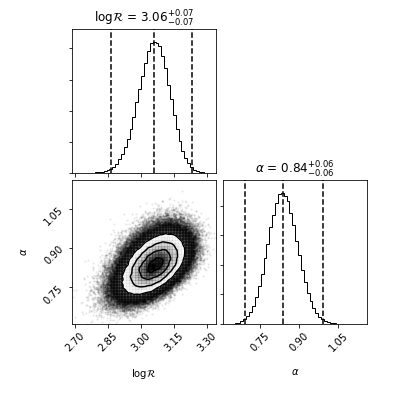

In [18]:
from IPython.display import Image
Image(filename='barb_tutorial.png') 

<div class="alert alert-block alert-warning">
<span style="font-family:Comic Sans MS">
<font color=DarkGoldenRod>
- If the maximum number of iterations isn't high enough, then the function will not converge. For most cases, max_n = 100000 is enough for the function to converge.
        <br>
- You might notice that the program is slow to run when the number of cpus available, cpu_num, is set to just 1, and so it is reccomended that you set the number of cpus available to a number greater than one. 
        <br>
    &nbsp;&nbsp;&nbsp;&nbsp; - It is also not reccomended that you run this program on a head node and instead opt to submit your job to a job scheduler because this program requires a large amount of computational power.
</font>
</span>
</div>

<div class="alert alert-block alert-success">
<span style="font-family:Comic Sans MS">
<font color=DarkOliveGreen>
You are now ready to run barb!
</font>
</span>
</div>